In [2]:
%matplotlib inline
import sys
import os
import ml3
import matplotlib.pyplot as plt
import numpy as np
import torch


In [3]:
EXP_FOLDER = os.path.join(ml3.__path__[0], "experiments/data/sine_exp")

seeds = [0, 1, 2, 3, 4]


In [4]:
# load results
train_reg = np.zeros((50, len(seeds)))
train_ml3 = np.zeros_like(train_reg)

test_reg_loss = np.zeros((100, len(seeds)))
test_ml3_loss = np.zeros_like(test_reg_loss)

test_loss_trace = np.zeros_like(test_reg_loss)
n_steps = 1

for j, seed in enumerate(seeds):
    exp_file = "sine_regression_seed_{}.pkl".format(seed)
    exp_filehandle = open(os.path.join(EXP_FOLDER, exp_file), "rb")
    data = dill.load(exp_filehandle)
    
    train_reg[:, j] = np.asarray([np.vstack(data[i]['train_reg']['loss_trace']).mean(axis=0)[n_steps] for i in range(len(data))])
    train_ml3[:, j] =  np.asarray([np.vstack(data[i]['train_ml3']['loss_trace']).mean(axis=0)[n_steps] for i in range(len(data))])
  
    test_reg_loss[:, j] = np.vstack(data[-1]['test_reg']['loss_trace']).mean(axis=0)
    test_ml3_loss[:, j] = np.vstack(data[-1]['test_ml3']['loss_trace']).mean(axis=0)
    
    

FileNotFoundError: [Errno 2] No such file or directory: '/Users/fmeier/projects/LearningToLearn/ml3/experiments/data/sine_exp/sine_regression_seed_0.pkl'

##  Plots for Experiments of Subsection 4.1.1 (Learning Losses for Regression)
##  meta training: single task, meta test: multi task
first we plot the performance of the meta loss when used to optimize the meta training tasks, as a function of (outer) meta training iterations.

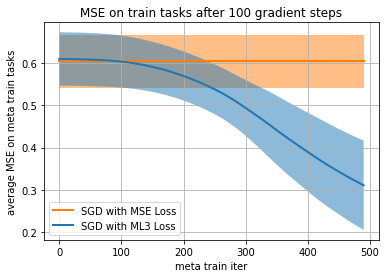

In [4]:
# mean and variance over seeds
mu1 = train_reg.mean(axis=1)
sigma1 = train_reg.std(axis=1)
mu2 = train_ml3.mean(axis=1)
sigma2 = train_ml3.std(axis=1)
t = np.arange(0, 500, 10)

# plot it!
fig, ax = plt.subplots(1)
ax.plot(t, mu1, lw=2, label='SGD with MSE Loss', color='C1')
ax.plot(t, mu2, lw=2, label='SGD with ML3 Loss', color='C0')
ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor='C1', alpha=0.5)
ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='C0', alpha=0.5)
ax.set_title(r'MSE on train tasks after 100 gradient steps')
#ax.legend(loc='upper left')
ax.set_xlabel('meta train iter')
ax.set_ylabel('average MSE on meta train tasks')
ax.grid()
ax.legend(loc='lower left')
plt.savefig("{}/sine_meta_training.png".format(EXP_FOLDER))

### evaluating learned meta loss network on test tasks
next we plot the performance of the final meta loss network when used to optimize the new test tasks at meta test time. Here the x-axis represents the number of gradient descent steps.

<Figure size 432x288 with 0 Axes>

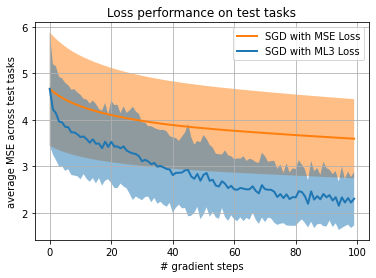

In [5]:
plt.figure()
# mean and variance over seeds
mu1 = test_reg_loss.mean(axis=1)
sigma1 = test_reg_loss.std(axis=1)
mu2 = test_ml3_loss.mean(axis=1)
sigma2 = test_ml3_loss.std(axis=1)
t = np.arange(0, 100)

# plot it!
fig, ax = plt.subplots(1)
ax.plot(t, mu1, lw=2, label='SGD with MSE Loss', color='C1')
ax.plot(t, mu2, lw=2, label='SGD with ML3 Loss', color='C0')
ax.fill_between(t, mu1+sigma1, mu1-sigma1, facecolor='C1', alpha=0.5)
ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='C0', alpha=0.5)
ax.set_title(r'Loss performance on test tasks')
ax.set_xlabel('# gradient steps')
ax.set_ylabel('average MSE across test tasks')
ax.grid()
ax.legend()
plt.savefig("{}/sine_test_loss_on_new_tasks.png".format(EXP_FOLDER))
